In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/upi-transactions-dataset/MyTransaction.csv


In [60]:
upi = pd.read_csv("/kaggle/input/upi-transactions-dataset/MyTransaction.csv")
upi.head()

,Date,Category,RefNo,Date.1,Withdrawal,Deposit,Balance
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/2023,Rent,3.00E+11,1/1/2023,3950.0,0.0,1837.23
2,3/1/2023,Misc,3.00E+11,3/1/2023,105.0,0.0,1732.23
3,3/1/2023,Misc,3.37E+11,3/1/2023,0.0,55.0,1787.23
4,3/1/2023,Food,3.00E+11,3/1/2023,56.0,0.0,1731.23


In [61]:
upi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1469 non-null   object 
 1   Category    1469 non-null   object 
 2   RefNo       1469 non-null   object 
 3   Date.1      1469 non-null   object 
 4   Withdrawal  1469 non-null   float64
 5   Deposit     1469 non-null   float64
 6   Balance     1469 non-null   float64
dtypes: float64(3), object(4)
memory usage: 80.5+ KB


In [62]:
upi.describe()

,Withdrawal,Deposit,Balance
count,1469.000000,1469.000000,1469.000000
mean,389.159837,385.247277,5524.807556
std,1622.116130,3061.489157,7347.341934
min,0.000000,0.000000,0.150000
25%,25.000000,0.000000,747.550000
50%,50.000000,0.000000,1955.740000
75%,138.000000,0.000000,7701.620000
max,21000.000000,34800.000000,36119.740000


In [63]:
upi.shape

(1470, 7)

In [64]:
upi = upi.drop_duplicates()
upi

,Date,Category,RefNo,Date.1,Withdrawal,Deposit,Balance
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/2023,Rent,3.00E+11,1/1/2023,3950.0,0.0,1837.23
2,3/1/2023,Misc,3.00E+11,3/1/2023,105.0,0.0,1732.23
3,3/1/2023,Misc,3.37E+11,3/1/2023,0.0,55.0,1787.23
4,3/1/2023,Food,3.00E+11,3/1/2023,56.0,0.0,1731.23
...,...,...,...,...,...,...,...
1465,13/12/23,Food,3.71E+11,13/12/23,26.0,0.0,46.68
1466,13/12/23,Food,3.71E+11,13/12/23,15.0,0.0,31.68
1467,13/12/23,Transport,3.35E+11,13/12/23,0.0,1718.0,1749.68
1468,13/12/23,Misc,3.71E+11,13/12/23,1718.0,0.0,31.68


In [65]:
upi.Category.value_counts()

Category
Food         911
Misc         503
Shopping      32
Salary        10
Rent           7
Transport      3
Name: count, dtype: int64

In [66]:
upi[upi['Date']==upi['Date.1']]

,Date,Category,RefNo,Date.1,Withdrawal,Deposit,Balance
1,1/1/2023,Rent,3.00E+11,1/1/2023,3950.0,0.0,1837.23
2,3/1/2023,Misc,3.00E+11,3/1/2023,105.0,0.0,1732.23
3,3/1/2023,Misc,3.37E+11,3/1/2023,0.0,55.0,1787.23
4,3/1/2023,Food,3.00E+11,3/1/2023,56.0,0.0,1731.23
5,3/1/2023,Misc,3.37E+11,3/1/2023,1.0,0.0,1730.23
...,...,...,...,...,...,...,...
1464,12/12/2023,Transport,3.35E+11,12/12/2023,1718.0,0.0,72.68
1465,13/12/23,Food,3.71E+11,13/12/23,26.0,0.0,46.68
1466,13/12/23,Food,3.71E+11,13/12/23,15.0,0.0,31.68
1467,13/12/23,Transport,3.35E+11,13/12/23,0.0,1718.0,1749.68


In [67]:
upi[upi['Date']!=upi['Date.1']]

,Date,Category,RefNo,Date.1,Withdrawal,Deposit,Balance
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,10/1/2023,Food,3.38E+11,11/1/2023,27.00,0.0,1421.73
93,20/01/23,Misc,3.39E+11,21/01/23,0.00,500.0,623.74
156,29/01/23,Food,3.40E+11,30/01/23,40.00,0.0,2299.41
398,15/03/23,Food,3.07E+11,16/03/23,55.00,0.0,737.26
439,25/03/23,Misc,3.08E+11,26/03/23,2826.00,0.0,8700.54
480,1/4/2023,Misc,0,31/03/23,0.00,32.0,6728.94
665,30/04/23,Misc,3.49E+11,1/5/2023,152.00,0.0,12478.52
666,30/04/23,Food,3.49E+11,1/5/2023,50.00,0.0,12428.52
683,2/5/2023,Misc,3.49E+11,3/5/2023,1391.16,0.0,4094.01


In [68]:
finalfeat = ['Date.1', 'RefNo', 'Category', 'Withdrawal', 'Deposit', 'Balance']
upif = upi[finalfeat]
upif

,Date.1,RefNo,Category,Withdrawal,Deposit,Balance
0,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/2023,3.00E+11,Rent,3950.0,0.0,1837.23
2,3/1/2023,3.00E+11,Misc,105.0,0.0,1732.23
3,3/1/2023,3.37E+11,Misc,0.0,55.0,1787.23
4,3/1/2023,3.00E+11,Food,56.0,0.0,1731.23
...,...,...,...,...,...,...
1465,13/12/23,3.71E+11,Food,26.0,0.0,46.68
1466,13/12/23,3.71E+11,Food,15.0,0.0,31.68
1467,13/12/23,3.35E+11,Transport,0.0,1718.0,1749.68
1468,13/12/23,3.71E+11,Misc,1718.0,0.0,31.68


In [69]:
import datetime
import calendar

In [70]:
date1 = "12/03/2004"
date_object = datetime.datetime.strptime(date1, "%d/%m/%Y")
month_number = date_object.month
month_name = calendar.month_name[month_number]
m = calendar.month_name[datetime.datetime.strptime(date1, "%d/%m/%Y").month]
print(month_name)
print(m)

March
March


In [71]:
upif['Date'] = pd.to_datetime(upi['Date.1'] , format = "mixed",dayfirst=True)
upif

,Date.1,RefNo,Category,Withdrawal,Deposit,Balance,Date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1/1/2023,3.00E+11,Rent,3950.0,0.0,1837.23,2023-01-01
2,3/1/2023,3.00E+11,Misc,105.0,0.0,1732.23,2023-01-03
3,3/1/2023,3.37E+11,Misc,0.0,55.0,1787.23,2023-01-03
4,3/1/2023,3.00E+11,Food,56.0,0.0,1731.23,2023-01-03
...,...,...,...,...,...,...,...
1465,13/12/23,3.71E+11,Food,26.0,0.0,46.68,2023-12-13
1466,13/12/23,3.71E+11,Food,15.0,0.0,31.68,2023-12-13
1467,13/12/23,3.35E+11,Transport,0.0,1718.0,1749.68,2023-12-13
1468,13/12/23,3.71E+11,Misc,1718.0,0.0,31.68,2023-12-13


In [72]:
upif['Month'] = upif['Date'].dt.month
upif['Day'] = upif['Date'].dt.day
upif['Year'] = upif['Date'].dt.year
upif

,Date.1,RefNo,Category,Withdrawal,Deposit,Balance,Date,Month,Day,Year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,1/1/2023,3.00E+11,Rent,3950.0,0.0,1837.23,2023-01-01,1.0,1.0,2023.0
2,3/1/2023,3.00E+11,Misc,105.0,0.0,1732.23,2023-01-03,1.0,3.0,2023.0
3,3/1/2023,3.37E+11,Misc,0.0,55.0,1787.23,2023-01-03,1.0,3.0,2023.0
4,3/1/2023,3.00E+11,Food,56.0,0.0,1731.23,2023-01-03,1.0,3.0,2023.0
...,...,...,...,...,...,...,...,...,...,...
1465,13/12/23,3.71E+11,Food,26.0,0.0,46.68,2023-12-13,12.0,13.0,2023.0
1466,13/12/23,3.71E+11,Food,15.0,0.0,31.68,2023-12-13,12.0,13.0,2023.0
1467,13/12/23,3.35E+11,Transport,0.0,1718.0,1749.68,2023-12-13,12.0,13.0,2023.0
1468,13/12/23,3.71E+11,Misc,1718.0,0.0,31.68,2023-12-13,12.0,13.0,2023.0


Preprocessing Done!!! EDA and DataViz begins now!!!

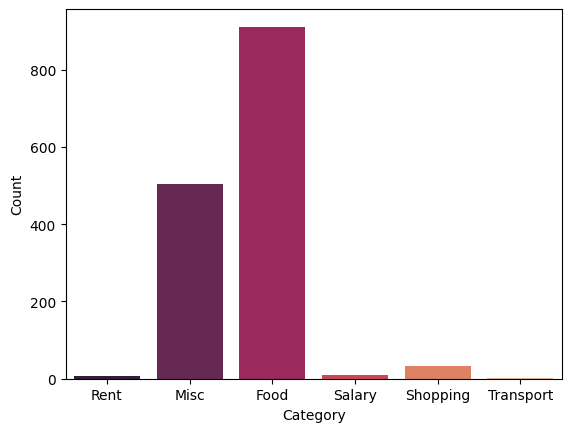

In [73]:
sns.countplot(data=upif, x = 'Category', palette = 'rocket')
plt.ylabel("Count")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Month', ylabel='Balance'>

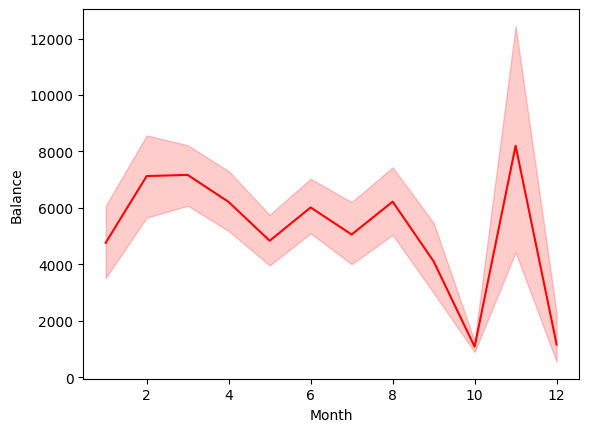

In [74]:
sns.lineplot(data=upif, x = 'Month', y= 'Balance', color = 'red')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Month', ylabel='Withdrawal'>

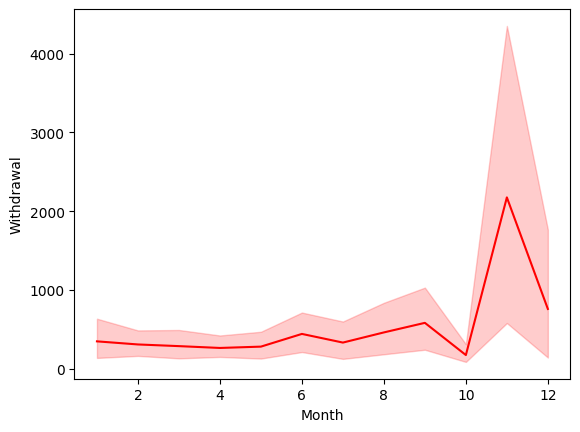

In [75]:
sns.lineplot(data=upif, x = 'Month', y= 'Withdrawal', color = 'red')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Month', ylabel='Deposit'>

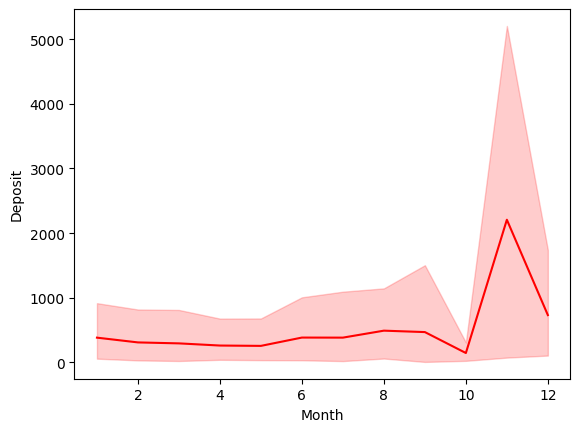

In [76]:
sns.lineplot(data=upif, x = 'Month', y= 'Deposit', color = 'red')

In [77]:
ripe = upif['Day']
upif['Week'] = pd.cut(ripe, 4)
upif

,Date.1,RefNo,Category,Withdrawal,Deposit,Balance,Date,Month,Day,Year,Week
0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,1/1/2023,3.00E+11,Rent,3950.0,0.0,1837.23,2023-01-01,1.0,1.0,2023.0,"(0.97, 8.5]"
2,3/1/2023,3.00E+11,Misc,105.0,0.0,1732.23,2023-01-03,1.0,3.0,2023.0,"(0.97, 8.5]"
3,3/1/2023,3.37E+11,Misc,0.0,55.0,1787.23,2023-01-03,1.0,3.0,2023.0,"(0.97, 8.5]"
4,3/1/2023,3.00E+11,Food,56.0,0.0,1731.23,2023-01-03,1.0,3.0,2023.0,"(0.97, 8.5]"
...,...,...,...,...,...,...,...,...,...,...,...
1465,13/12/23,3.71E+11,Food,26.0,0.0,46.68,2023-12-13,12.0,13.0,2023.0,"(8.5, 16.0]"
1466,13/12/23,3.71E+11,Food,15.0,0.0,31.68,2023-12-13,12.0,13.0,2023.0,"(8.5, 16.0]"
1467,13/12/23,3.35E+11,Transport,0.0,1718.0,1749.68,2023-12-13,12.0,13.0,2023.0,"(8.5, 16.0]"
1468,13/12/23,3.71E+11,Misc,1718.0,0.0,31.68,2023-12-13,12.0,13.0,2023.0,"(8.5, 16.0]"


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Balance', ylabel='Density'>

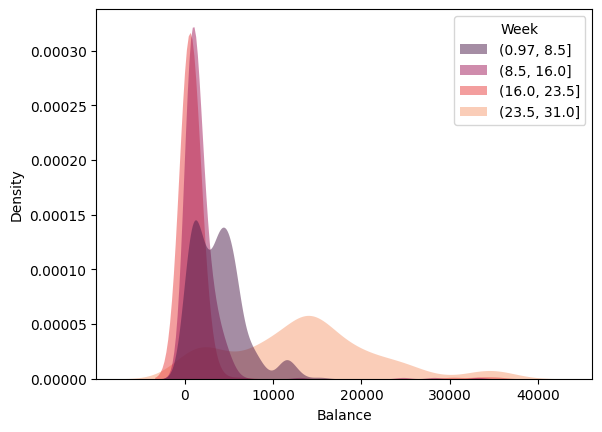

In [78]:
sns.kdeplot(
   data=upif, x="Balance", hue="Week",
   fill=True, common_norm=False, palette="rocket",
   alpha=.5, linewidth=0,
)

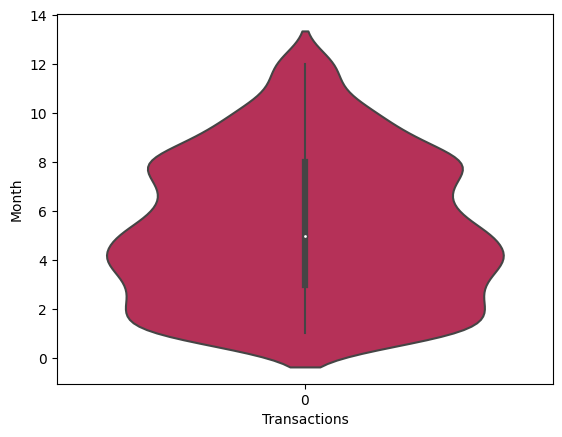

In [79]:
sns.violinplot(data=upif['Month'],palette='rocket')
plt.xlabel("Transactions")
plt.ylabel("Month")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='Balance', ylabel='Density'>

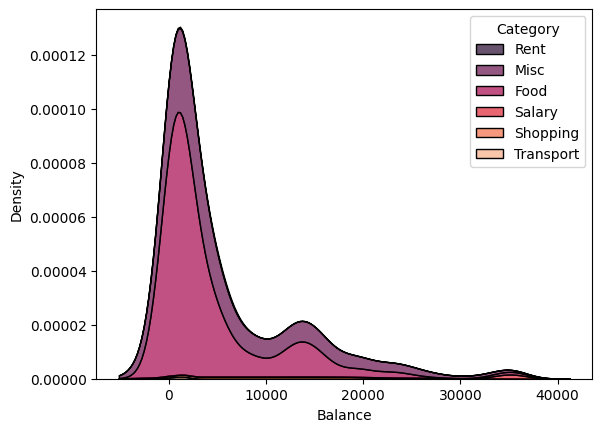

In [80]:
sns.kdeplot(data=upif, x="Balance", hue="Category", multiple = "stack", palette="rocket")

<Axes: >

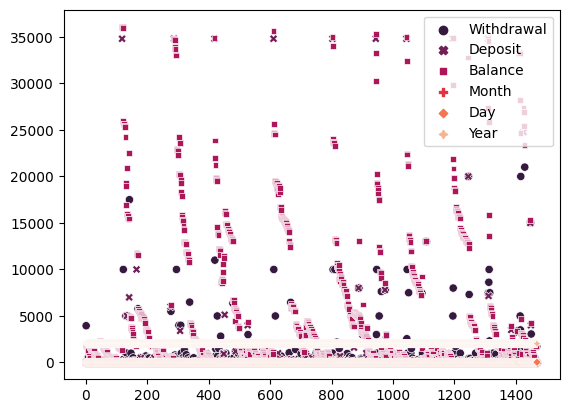

In [81]:
sns.scatterplot(data=upif, palette='rocket')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping

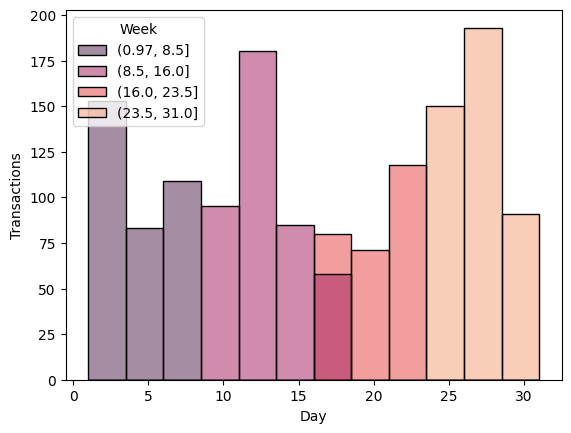

In [82]:
sns.histplot(data=upif, x="Day", palette = "rocket", hue = "Week")
plt.ylabel("Transactions")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

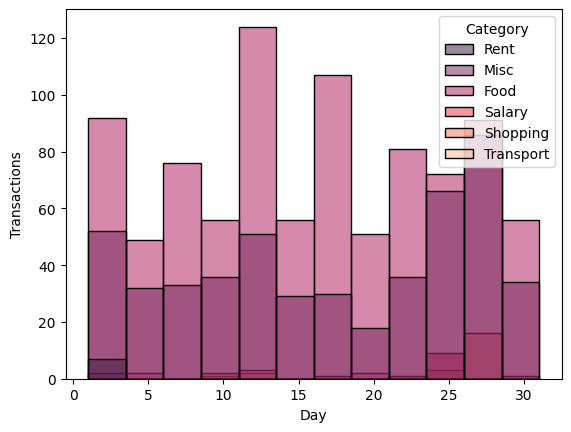

In [83]:
sns.histplot(data=upif, x="Day", palette = "rocket", hue = "Category")
plt.ylabel("Transactions")
plt.show()

Time for some ML algs!!! Can I predict:
1. balance given any date in the future?
2. category with the most transactions after a few more months?



In [84]:
upif
#upif['Week_no'] = upif['Week'].map('(0.97,8.5]':1, '(8.5,16.0]':2, '(16.0,23.5]':3, '(23.5,31.0]':4)

,Date.1,RefNo,Category,Withdrawal,Deposit,Balance,Date,Month,Day,Year,Week
0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,1/1/2023,3.00E+11,Rent,3950.0,0.0,1837.23,2023-01-01,1.0,1.0,2023.0,"(0.97, 8.5]"
2,3/1/2023,3.00E+11,Misc,105.0,0.0,1732.23,2023-01-03,1.0,3.0,2023.0,"(0.97, 8.5]"
3,3/1/2023,3.37E+11,Misc,0.0,55.0,1787.23,2023-01-03,1.0,3.0,2023.0,"(0.97, 8.5]"
4,3/1/2023,3.00E+11,Food,56.0,0.0,1731.23,2023-01-03,1.0,3.0,2023.0,"(0.97, 8.5]"
...,...,...,...,...,...,...,...,...,...,...,...
1465,13/12/23,3.71E+11,Food,26.0,0.0,46.68,2023-12-13,12.0,13.0,2023.0,"(8.5, 16.0]"
1466,13/12/23,3.71E+11,Food,15.0,0.0,31.68,2023-12-13,12.0,13.0,2023.0,"(8.5, 16.0]"
1467,13/12/23,3.35E+11,Transport,0.0,1718.0,1749.68,2023-12-13,12.0,13.0,2023.0,"(8.5, 16.0]"
1468,13/12/23,3.71E+11,Misc,1718.0,0.0,31.68,2023-12-13,12.0,13.0,2023.0,"(8.5, 16.0]"


In [85]:
feats = ['Category', 'Withdrawal', 'Deposit', 'Balance', 'month', 'day', 'year']
target1 = upif['Balance']
upif

,Date.1,RefNo,Category,Withdrawal,Deposit,Balance,Date,Month,Day,Year,Week
0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,1/1/2023,3.00E+11,Rent,3950.0,0.0,1837.23,2023-01-01,1.0,1.0,2023.0,"(0.97, 8.5]"
2,3/1/2023,3.00E+11,Misc,105.0,0.0,1732.23,2023-01-03,1.0,3.0,2023.0,"(0.97, 8.5]"
3,3/1/2023,3.37E+11,Misc,0.0,55.0,1787.23,2023-01-03,1.0,3.0,2023.0,"(0.97, 8.5]"
4,3/1/2023,3.00E+11,Food,56.0,0.0,1731.23,2023-01-03,1.0,3.0,2023.0,"(0.97, 8.5]"
...,...,...,...,...,...,...,...,...,...,...,...
1465,13/12/23,3.71E+11,Food,26.0,0.0,46.68,2023-12-13,12.0,13.0,2023.0,"(8.5, 16.0]"
1466,13/12/23,3.71E+11,Food,15.0,0.0,31.68,2023-12-13,12.0,13.0,2023.0,"(8.5, 16.0]"
1467,13/12/23,3.35E+11,Transport,0.0,1718.0,1749.68,2023-12-13,12.0,13.0,2023.0,"(8.5, 16.0]"
1468,13/12/23,3.71E+11,Misc,1718.0,0.0,31.68,2023-12-13,12.0,13.0,2023.0,"(8.5, 16.0]"


In [86]:
ml1 = upi[feats]

KeyError: "['month', 'day', 'year'] not in index"